In [1]:
#this notebook will make a model for casa using GSM
from astropy.wcs import WCS
from pygsm import GlobalSkyModel# The 2016 model sucks SO much
import healpy as hp
from pixell import enmap, utils
from pixell import reproject
from pixell import enplot

In [2]:
# Convenient wrapper for displaying enmaps
def eshow(x,**kwargs): enplot.show(enplot.plot(x,**kwargs)) 

In [26]:
def GSM_from_fits(fitsfile,outfile):
    """This function will take a fitsfile, and create a GSM model of same area
    
    Arguments: 
    fitsfile: Path to fits file with shape (nx,ny,pol,freq
    outfile: Name of output GSM fits file
    
    Returns:
    GSM model over area of input fitsimage
    """
    
    #read in input fits image
    image = enmap.read_map(fitsfile)
    #read GSM model
    gsm_hp = hp.read_map('/lustre/aoc/projects/hera/gtucker/repositories/plimpy/Summer2019/GSM150MHz.fits')
    
    #Project a healpix map to an enmap of chosen shape and wcs
    gsm = reproject.enmap_from_healpix_interp(gsm_hp, image.T[0][0].shape, image.wcs)
    gsm -= gsm.mean()
    eshow(gsm/3., min=-45, max = 150)
    enmap.write_fits(outfile+'.fits',gsm)
    return 'Done!'
    

Set OBSGEO-B to   -30.721389 from OBSGEO-[XYZ].
Set OBSGEO-H to     1496.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/lustre/aoc/projects/hera/gtucker/anaconda3/envs/hera/lib/python3.6/site-packages/healpy-1.13.0-py3.6-linux-x86_64.egg/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


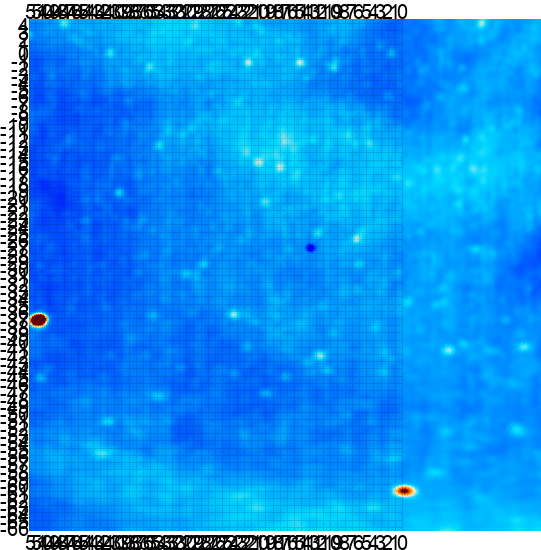

'Done!'

In [27]:
#A test
GSM_from_fits('/lustre/aoc/projects/hera/gtucker/repositories/plimpy/pb_with_casa/real_ejones.fits','GSM_test')